Exercícios de Revisão A2
--
Professor: Renato Rocha Souza  
--

In [2]:
import itertools
import random
from collections import Counter
import re

import pymysql
import sqlite3
import getpass

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas.io.sql as psql

%matplotlib inline

 Duvidas: 
 
 #### PARTE 2 - SHELL LINUX ****** diferença entre ascii e alfabética ( apenas sort -n / sort -d ?)
 
  Questao 2 
  
     Como aplicar a funcao para todas as colunas.
     --> df.applymap(function) ##Aplica afunction para cada elemento do dataframe.
     --> df.apply(function, axis=1) ## Aplica a function para a linha(axis=0) ou coluna(axis=1).
     --> df.map(function) ## mesmo que df.applymap(), so que apenas para series.
     Uso do apply.
     
 

### Parte I - Pandas

Para o Dataframe abaixo, resolva as seguintes tarefas:

In [50]:
pd_zoo = pd.read_csv('../Dados/zoo.csv')
pd_zoo.head()

,animal,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,True,False,False,True,False,False,True,True,True,True,False,False,4,False,False,True,mammal
1,antelope,True,False,False,True,False,False,False,True,True,True,False,False,4,True,False,True,mammal
2,bass,False,False,True,False,False,True,True,True,True,False,False,True,0,True,False,False,fish
3,bear,True,False,False,True,False,False,True,True,True,True,False,False,4,False,False,True,mammal
4,boar,True,False,False,True,False,False,True,True,True,True,False,False,4,True,False,True,mammal


In [457]:
L = []
for x in range(10):
    L.append(pd_zoo.loc[x,'animal'])
    

SyntaxError: invalid syntax (<ipython-input-462-0265ca90b7e1>, line 1)

1 - Crie uma série somente com os nomes dos animais (primeira coluna)

In [123]:
serie_animal = pd_zoo['animal']
print(type(serie_animal))
serie_animal.head(6)

<class 'pandas.core.series.Series'>


0    aardvark
1    antelope
2        bass
3        bear
4        boar
5     buffalo
Name: animal, dtype: object

2 - Transforme os campos com as strings "True"/"False" em variáveis booleanas True/False  
Veja as dicas [aqui](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.apply.html) e [aqui](https://stackoverflow.com/questions/49259580/replace-values-in-a-pandas-series-via-dictionary-efficiently)

In [124]:
#serie_animal = pd_zoo.milk.map({False:'Falso', True:'Verdade'})  #### Apenas para uma coluna
#serie_animal.head(6)

In [95]:
def fun(x):
    if x == True:
        return 'Verdadeiro'
    elif x == False:
        return 'Falso'
    else:
        return x
pd_zoo.applymap(fun).head(6)

,animal,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,Verdadeiro,Falso,Falso,Verdadeiro,Falso,Falso,Verdadeiro,Verdadeiro,Verdadeiro,Verdadeiro,Falso,Falso,4,Falso,Falso,Verdadeiro,mammal
1,antelope,Verdadeiro,Falso,Falso,Verdadeiro,Falso,Falso,Falso,Verdadeiro,Verdadeiro,Verdadeiro,Falso,Falso,4,Verdadeiro,Falso,Verdadeiro,mammal
2,bass,Falso,Falso,Verdadeiro,Falso,Falso,Verdadeiro,Verdadeiro,Verdadeiro,Verdadeiro,Falso,Falso,Verdadeiro,Falso,Verdadeiro,Falso,Falso,fish
3,bear,Verdadeiro,Falso,Falso,Verdadeiro,Falso,Falso,Verdadeiro,Verdadeiro,Verdadeiro,Verdadeiro,Falso,Falso,4,Falso,Falso,Verdadeiro,mammal
4,boar,Verdadeiro,Falso,Falso,Verdadeiro,Falso,Falso,Verdadeiro,Verdadeiro,Verdadeiro,Verdadeiro,Falso,Falso,4,Verdadeiro,Falso,Verdadeiro,mammal
5,buffalo,Verdadeiro,Falso,Falso,Verdadeiro,Falso,Falso,Falso,Verdadeiro,Verdadeiro,Verdadeiro,Falso,Falso,4,Verdadeiro,Falso,Verdadeiro,mammal


In [31]:
trocado = pd_zoo.hair.apply(lambda x: str(x))
#trocado

In [32]:
pd_zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
animal      101 non-null object
hair        101 non-null bool
feathers    101 non-null bool
eggs        101 non-null bool
milk        101 non-null bool
airborne    101 non-null bool
aquatic     101 non-null bool
predator    101 non-null bool
toothed     101 non-null bool
backbone    101 non-null bool
breathes    101 non-null bool
venomous    101 non-null bool
fins        101 non-null bool
legs        101 non-null int64
tail        101 non-null bool
domestic    101 non-null bool
catsize     101 non-null bool
type        101 non-null object
dtypes: bool(15), int64(1), object(2)
memory usage: 3.9+ KB


In [37]:
trocado2 = pd_zoo.feathers.map({True:'true', False:'false'})

In [41]:
booleanas =  pd_zoo.loc[:, pd_zoo.dtypes==bool ].columns
booleanas

Index(['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator',
       'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'tail',
       'domestic', 'catsize'],
      dtype='object')

In [48]:
pd_zoo[booleanas] = pd_zoo[booleanas].applymap(lambda x: str(x))
pd_zoo.head(5)

,animal,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,True,False,False,True,False,False,True,True,True,True,False,False,4,False,False,True,mammal
1,antelope,True,False,False,True,False,False,False,True,True,True,False,False,4,True,False,True,mammal
2,bass,False,False,True,False,False,True,True,True,True,False,False,True,0,True,False,False,fish
3,bear,True,False,False,True,False,False,True,True,True,True,False,False,4,False,False,True,mammal
4,boar,True,False,False,True,False,False,True,True,True,True,False,False,4,True,False,True,mammal


In [49]:
pd_zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
animal      101 non-null object
hair        101 non-null object
feathers    101 non-null object
eggs        101 non-null object
milk        101 non-null object
airborne    101 non-null object
aquatic     101 non-null object
predator    101 non-null object
toothed     101 non-null object
backbone    101 non-null object
breathes    101 non-null object
venomous    101 non-null object
fins        101 non-null object
legs        101 non-null int64
tail        101 non-null object
domestic    101 non-null object
catsize     101 non-null object
type        101 non-null object
dtypes: int64(1), object(17)
memory usage: 14.3+ KB


In [121]:
###concatenar animal e type:
#pd_zoo['concatenando'] = pd_zoo['animal'].map(str)+pd_zoo['type'].map(str)
#pd_zoo.head(11)

3 - Crie um novo dataframe somente com os Mamíferos

In [61]:
pd_zoo[pd_zoo.type == 'mammal'].head(5)

,animal,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,True,False,False,True,False,False,True,True,True,True,False,False,4,False,False,True,mammal
1,antelope,True,False,False,True,False,False,False,True,True,True,False,False,4,True,False,True,mammal
3,bear,True,False,False,True,False,False,True,True,True,True,False,False,4,False,False,True,mammal
4,boar,True,False,False,True,False,False,True,True,True,True,False,False,4,True,False,True,mammal
5,buffalo,True,False,False,True,False,False,False,True,True,True,False,False,4,True,False,True,mammal


In [155]:
#pd_zoo.applymap(lambda x: x if pd_zoo['type'] == 'mammal')
#https://pt.stackoverflow.com/questions/17439/como-filtrar-um-data-frame

In [466]:
pd_zoo.loc[0,'hair']

True

In [56]:
 pd_zoo.loc[[2,4,5],['animal','legs']]

,animal,legs
2,bass,0
4,boar,4
5,buffalo,4


In [ ]:
pd_zoo.iloc[]

In [53]:
 pd_zoo[pd_zoo.type == 'mammal'].head(5)

,animal,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,True,False,False,True,False,False,True,True,True,True,False,False,4,False,False,True,mammal
1,antelope,True,False,False,True,False,False,False,True,True,True,False,False,4,True,False,True,mammal
3,bear,True,False,False,True,False,False,True,True,True,True,False,False,4,False,False,True,mammal
4,boar,True,False,False,True,False,False,True,True,True,True,False,False,4,True,False,True,mammal
5,buffalo,True,False,False,True,False,False,False,True,True,True,False,False,4,True,False,True,mammal


4 - Crie um gráfico com os números de patas por animais  
Veja as dicas [aqui](https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.DataFrame.plot.html)  

Text(0.5,0,'animals')

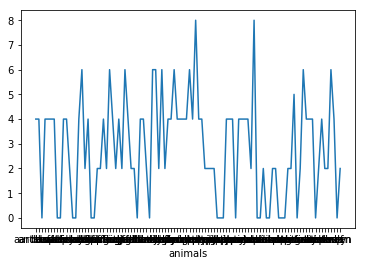

In [63]:
plt.plot(pd_zoo.animal, pd_zoo.legs)
        
plt.xlabel('animals')

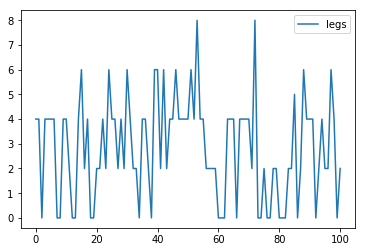

In [64]:
pd_zoo.plot()

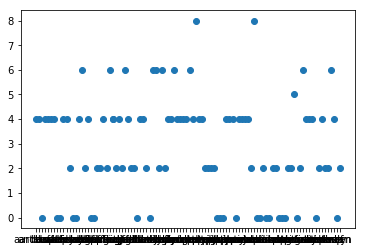

In [166]:
plt.scatter(pd_zoo['animal'],pd_zoo['legs'])

5 - crie uma tabela no banco alunos a partir do dataframe  
ver referência [aqui](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_sql.html)

In [301]:
p = getpass.getpass()
conn = pymysql.connect(host='127.0.0.1', #localhost
                       port=3306, 
                       user='aluno', 
                       passwd=p, 
                       db='alunos')

········


In [26]:
conn = sqlite3.Connection('tabela_zoo')

In [27]:
pd_zoo.to_sql('tabela_zoo', con = conn)

In [54]:
cur = conn.cursor()

In [ ]:
cur.execute(selct * from tabela_zoo)
for x

Para o Dataframe abaixo, resolva as seguintes tarefas:

In [ ]:
pd_zoo = pd.read_csv('../Dados/zoo.csv')
pd_zoo.head()

1 - Crie uma série somente com os nomes dos animais (primeira coluna)

In [ ]:
res_1 = pd_zoo.animal

2 - Transforme os campos com as strings "True"/"False" em variáveis booleanas True/False
Veja as dicas aqui e aqui

In [ ]:
pd_zoo = pd_zoo.apply(lambda x: x.replace(True,'Verdadeiro'))

In [ ]:
pd_zoo = pd_zoo.apply(lambda x: x.replace(False,'Falso'))
pd_zoo.legs[pd_zoo.legs == 'Falso'] = 0

In [ ]:
pd_zoo[0:10]

3 - Crie um novo dataframe somente com os Mamíferos

In [ ]:
mamiferos = pd_zoo[pd_zoo.type =='mammal']
mamiferos[0:10]

4 - Crie um gráfico com os números de patas por animais
Veja as dicas aqui

In [ ]:
pd_zoo.legs.plot(kind = 'hist',color = 'r')

5 - crie uma tabela no banco alunos a partir do dataframe
ver referência aqui

In [ ]:
p = getpass.getpass()
conn = pymysql.connect(host='127.0.0.1', #localhost
                       port=3306, 
                       user='aluno', 
                       passwd=p, 
                       db='alunos')
In [ ]:
conn = sqlite3.connect('tabela_zoo')

In [ ]:
pd_zoo.to_sql('tabela_zoo', con=conn)
cur = conn.cursor()

In [ ]:
cur.execute("SELECT * FROM tabela_zoo;")

for r in cur.fetchmany(12):
    print(r)

### Parte 2 - Shell Linux

Usando comandos do Shell, abra o arquivo ../Dados/DomCasmurroMachadoAssis.txt e resolva as seguintes tarefas:

1 - Ordene as palavras do texto nas formas abaixo:
+ ordem ascii
+ ordem alfabética
+ ordem de "rima"

#### ****** diferença entre ascii e alfabética ( apenas sort -n / sort -d ?)


In [262]:
!cat  ../Dados/DomCasmurroMachadoAssis.txt | grep -l 'n ' | head

cat: write error: Broken pipe
(standard input)


In [446]:
## ordem ascii
!cat  ../Dados/DomCasmurroMachadoAssis.txt | tr -sc '[A-Z][a-z]' '[\012*]'| sort| uniq| head


]
a
A
ab
abafadas
abafado
abafando
abafava
abahuladas
uniq: write error: Broken pipe


In [ ]:
# reLu
!cat ../Dados/DomCasmurroMachadoAssis.txt | tr ']' '\n'| tr -sc '[a-z][A-ZÁÀÃÂÉÊÍÓÔÚÇ]' '[\012*]' | sort | uniq

In [ ]:
#ordem alfabética
!cat  ../Dados/DomCasmurroMachadoAssis.txt | tr -sc '[A-Z][a-z]' '[\012*]'| sort -d| uniq| head -n 20

In [ ]:
# reLu
!cat ../Dados/DomCasmurroMachadoAssis.txt | tr ']' '\n'| tr -sc '[a-záàâãéêíôóõúç][A-ZÁÀÃÂÉÊÍÓÔÚÇ]' '[\012*]' | sort -h | uniq

In [429]:
#ordem de rima:
! cat ../Dados/DomCasmurroMachadoAssis.txt | rev | sort | rev |head

In [445]:
# reLu
!cat ../Dados/DomCasmurroMachadoAssis.txt | tr [A-Z] [a-z] | tr ']' '\n'| tr -sc '[a-záàâãéêíôóõúç][A-ZÁÀÃÂÉÊÍÓÔÚÇ]' '[\012*]' | sort | uniq | rev | sort | rev

rev: stdin: Invalid or incomplete multibyte or wide character

a
á
acaba
barba
ameaça
bocca
bibliotheca
boneca
aconteça
astronomica
america
arithmetica
botica
banca
alliança
bonança
branca
boca
ácerca
acabada
abobada
achacada
alçada
assobradada
almofada
atrapalhada
acanhada
alumiada
agoniada
apropriada
alliviada
amada
acostumada
abotoada
aprimorada
apressada
accusada
assentada
apontada
apertada
agastada
assustada
amuada
attenuada
adequada
agradecida
aborrecida
arrependida
abatida
anda
ainda
barafunda
borda
área
bufa
amiga
barriga
antiga
acha
bochecha
batalha
bulha
agulha
amanhã
bainha
argolinha
artinha
amiguinha
adivinha
alcunha
allopatha
assobia
apparecia
acontecia
adolescencia
audiencia
benevolencia
apparencia
ausencia
affluencia
annuncia
astucia
arredia
accendia
arrependia
attendia
ardia
acudia
alheia
affligia
archeologia
bahia
attrahia
allopathia
alia
biblia
academia
astronomia
anatomia
allumia
agonia
babylonia
aria
acabaria
bradaria
andaria
acharia
brilharia
artilharia
acostumaria

In [84]:
! man sort

SORT(1)                          User Commands                         SORT(1)

NNAAMMEE
       sort - sort lines of text files

SSYYNNOOPPSSIISS
       ssoorrtt [_O_P_T_I_O_N]... [_F_I_L_E]...
       ssoorrtt [_O_P_T_I_O_N]... _-_-_f_i_l_e_s_0_-_f_r_o_m_=_F

DDEESSCCRRIIPPTTIIOONN
       Write sorted concatenation of all FILE(s) to standard output.

       With no FILE, or when FILE is -, read standard input.

       Mandatory  arguments  to  long  options are mandatory for short options
       too.  Ordering options:

       --bb, ----iiggnnoorree--lleeaaddiinngg--bbllaannkkss
              ignore leading blanks

       --dd, ----ddiiccttiioonnaarryy--oorrddeerr
              consider only blanks and alphanumeric characters

       --ff, ----iiggnnoorree--ccaassee
              fold lower case to upper case characters

       --gg, ----ggeenneerraall--

2 - Quantas palavras maiúsculas distintas há no texto?

In [105]:
!cat  ../Dados/DomCasmurroMachadoAssis.txt | tr -sc '[A-Z][a-z]' '[\012*]'| grep '^[A-Z]'| uniq |wc -l

7102


In [444]:
!cat ../Dados/DomCasmurroMachadoAssis.txt | tr -sc '[a-záàâãéêíôóõúç][A-ZÁÀÃÂÉÊÍÓÔÚÇ]' '[\012*]' | sort -n | uniq | grep -c '^[A-ZÁÀÃÂÉÊÍÓÕÔÚÇ]'

1531


In [102]:
! man grep


GREP(1)                     General Commands Manual                    GREP(1)

NNAAMMEE
       grep, egrep, fgrep, rgrep - print lines matching a pattern

SSYYNNOOPPSSIISS
       ggrreepp [_O_P_T_I_O_N_S] _P_A_T_T_E_R_N [_F_I_L_E...]
       ggrreepp [_O_P_T_I_O_N_S] [--ee _P_A_T_T_E_R_N]...  [--ff _F_I_L_E]...  [_F_I_L_E...]

DDEESSCCRRIIPPTTIIOONN
       ggrreepp searches the named input _F_I_L_Es for lines containing a match to the
       given _P_A_T_T_E_R_N.  If no files are specified, or if the file “--” is given,
       ggrreepp  searches  standard  input.   By default, ggrreepp prints the matching
       lines.

       In addition, the variant programs eeggrreepp, ffggrreepp and rrggrreepp are  the  same
       as  ggrreepp --EE,  ggrreepp --FF,  and  ggrreepp --rr, respectively.  These variants are
       deprecated, but are provided for backward 

       previously matched  by  the  _nth  parenthesized  subexpression  of  the
       regular expression.

   BBaassiicc vvss EExxtteennddeedd RReegguullaarr EExxpprreessssiioonnss
       In  basic  regular expressions the meta-characters ??, ++, {{, ||, ((, and ))
       lose their special meaning; instead use the  backslashed  versions  \\??,
       \\++, \\{{, \\||, \\((, and \\)).

EENNVVIIRROONNMMEENNTT VVAARRIIAABBLLEESS
       The   behavior  of  ggrreepp  is  affected  by  the  following  environment
       variables.

       The locale for category LLCC___f_o_o is  specified  by  examining  the  three
       environment  variables  LLCC__AALLLL, LLCC___f_o_o, LLAANNGG, in that order.  The first
       of these variables that is set specifies the locale.  For  example,  if
       LLCC__AALLLL  is not set, but LLCC__MMEESSSSAAGGEESS is set to pptt__BBRR, then 

#### expressões regulares:

In [ ]:
#  ^     (começa com * ) ex: grep '^tar'
#  $     (termina com * ) ex: grep 'la$'
#  []    (lista) ex: [abcde], [0-9], [a-j]
#  \w    (todos os caracteres alpha numéricos)
#  \w*   ( || infinitas vezes )


3 - Quantas palavras há com apenas uma, com apenas duas, e com apenas 3 vogais?

In [168]:
# Apenas 1 vogal:
!cat  ../Dados/DomCasmurroMachadoAssis.txt | tr -sc '[A-Z][a-z]' '[\012*]'| egrep '^[aeiouAEIOU][^aeiouAEIOU]*$|^[^aeiouAEIOU]*[aeiouAEIOU]$|^[^aeiouAEIOU]*[aeiou][^aeiouAEIOU]*$'|uniq| wc -l

25729


In [181]:
!cat  ../Dados/DomCasmurroMachadoAssis.txt | tr -sc '[A-Z][a-z]' '[\012*]'| grep -io '^[^aeiou]*[aeiou][^aeiou]*$' | head

The
of
Dom
de
This
is
for
the
of
in
grep: write error: Broken pipe
tr: write error: Broken pipe
tr: write error
cat: write error: Broken pipe


In [165]:
# 2 vogais:
## errado !cat  ../Dados/DomCasmurroMachadoAssis.txt | tr -sc '[A-Z][a-z]' '[\012*]'| grep -io '[aeiou]\{2\}' | head

oo
oo
io
oe
ou
oo
ou
ou
ou
ou
grep: write error: Broken pipe
tr: write error: Broken pipe
tr: write error
cat: write error: Broken pipe


In [187]:
!cat  ../Dados/DomCasmurroMachadoAssis.txt | tr -sc '[A-Z][a-z]' '[\012*]'| egrep -io '^[^aeiou]*[aeiou][^aeiou]*[aeiou][^aeiou]*$' | sort | uniq | wc -l

2350


In [189]:
# 3 vogais:
!cat  ../Dados/DomCasmurroMachadoAssis.txt | tr -sc '[A-Z][a-z]' '[\012*]'| grep -io '^[^aeiou]*[aeiou][^aeiou]*[aeiou][^aeiou]*[aeiou][^aeiou]*$'|sort |uniq | wc -l

3447


In [441]:
# reLu
!cat ../Dados/DomCasmurroMachadoAssis.txt | tr -sc '[a-záàâãéêíôóõúç][A-ZÁÀÃÂÉÊÍÓÔÚÇ]' '[\012*]' | grep [aeiouáàâãéêíôóõú][^aeiouáàâãéêíôóõú]*[aeiouáàâãéêíôóõú] | grep -vc [aeiouáàâãéêíôóõú].*[aeiouáàâãéêíôóõú].*[aeiouáàâãéêíôóõú]

20683


In [443]:
!cat ../Dados/DomCasmurroMachadoAssis.txt | tr -sc '[a-záàâãéêíôóõúç][A-ZÁÀÃÂÉÊÍÓÔÚÇ]' '[\012*]' | grep [aeiouáàâãéêíôóõú][^aeiouáàâãéêíôóõú]*[aeiouáàâãéêíôóõú][^aeiouáàâãéêíôóõú]*[aeiouáàâãéêíôóõú] | grep -vc [aeiouáàâãéêíôóõú].*[aeiouáàâãéêíôóõú].*[aeiouáàâãéêíôóõú].*[aeiouáàâãéêíôóõú]

13041


4 - Qual a sequência de comandos para criar um arquivo com os bigramas e suas contagens?

In [270]:
! cat ../Dados/DomCasmurroMachadoAssis.txt | tr -sc '[A-z]' '[\012*]' > DCMA.palavra
! tail -n +2 DCMA.palavra > DCMA.bi
! paste DCMA.palavra DCMA.bi | sort | uniq -c | sort -gr| head

   1217 n	o
    315 N	o
    238 o	que
    230 m	e
    188 que	n
    173 que	me
    151 Jos	Dias
    138 minha	m
    137 que	eu
    130 que	a
sort: write failed: 'standard output': Broken pipe
sort: write error


In [ ]:
# reLu
!cat ../Dados/DomCasmurroMachadoAssis.txt | tr -sc '[a-záàâãéêíôóõúç][A-ZÁÀÃÂÉÊÍÓÔÚÇ]' '[\012*]' > ../Dados/Dom_words.txt
!cat ../Dados/DomCasmurroMachadoAssis.txt | tr -sc '[a-záàâãéêíôóõúç][A-ZÁÀÃÂÉÊÍÓÔÚÇ]' '[\012*]' | tail  -n +2 > ../Dados/Dom_nextwords.txt
!paste ../Dados/Dom_words.txt ../Dados/Dom_nextwords.txt | sort | uniq -c | sort

### Parte 3 - Expressões Regulares

In [424]:
f = open('DomCasmurroMachadoAssis-Copy1.txt', 'r')
strings = re.findall(r'^[^aeiou]*[aeiou][aeiou][âeiou]*' ,f.read(), re.IGNORECASE)
strings

[]

In [427]:
f = open('DomCasmurroMachadoAssis-Copy1.txt', 'r')
strings = re.findall('%a%' ,f.read())
strings

[]

1 - Repita os exercícios 1 a 4 da parte 2 utilizando Python

In [428]:
f = open('../Dados/DomCasmurroMachadoAssis.txt', encoding='utf-8')
texto = f.read()

In [430]:
# ordem ascii, ordem alfabética, ordem de "rima".
f = open('../Dados/DomCasmurroMachadoAssis.txt',encoding='utf-8')
texto = f.read()
palavras = texto.split()
palavras = {p.strip(string.punctuation) for p in palavras}
palavras = {p for p in palavras if not p[0:1].isnumeric()}
rimas = {r[::-1] for r in palavras}

ordem1 = sorted(palavras,key=ascii)
ordem2 = sorted(palavras)
ordem3 = sorted(rimas)
ordem3 = [r[::-1] for r in ordem3]


In [436]:
# palavras maiúsculas
with open('../Dados/DomCasmurroMachadoAssis.txt',encoding='utf-8') as g:
    texto = g.read()
    texto = re.sub(r'»',' ',texto)
    words = texto.split()
    words = [p.strip(string.punctuation) for p in words]
    words = {m for m in words if re.search(r'^[A-ZÁÀÃÂÉÊÍÓÕÔÚÇ].*',m)}
    print(len(words))

1592


In [440]:
# 1 vogal:
with open('../Dados/DomCasmurroMachadoAssis.txt',encoding='utf-8') as h:
    texto = h.read()
    words = texto.split()
    words = [p.strip(string.punctuation) for p in words]
    vogal1 = [p for p in words if re.search(r'^[^AEIOUaeiouÁÂÃÀÉÊÍÓÔÕÚáàãâêéíóôõú]*[AEIOUaeiouÁÂÃÀÉÊÍÓÔÕÚáàãâêéíóôõú]{1}[^AEIOUaeiouÁÂÃÀÉÊÍÓÔÕÚáàãâêéíóôõú]*$',p)]
    

['\ufeffThe', 'of', 'Dom', 'de', 'This', 'is', 'for', 'the', 'of', 'in', 'the', 'and', 'most', 'parts', 'of', 'the', 'world', 'at', 'no', 'cost', 'and', 'with', 'no', 'may', 'copy', 'it', 'it', 'or', 'it', 'the', 'terms', 'of', 'the', 'with', 'this', 'or', 'at', 'If', 'not', 'in', 'the', 'to', 'check', 'the', 'laws', 'of', 'the', 'this', 'Dom', 'de', 'START', 'OF', 'THIS', 'DOM', 'Marc', 'at', 'in', 'an', 'to', 'for', 'the', 'DOM', 'POR', 'DE', 'DA', 'DE', 'DES', 'I', 'Do', 'da', 'o', 'no', 'trem', 'da', 'um', 'do', 'de', 'e', 'de', 'pé', 'de', 'mim', 'da', 'e', 'dos', 'e', 'A', 'e', 'os', 'ser', 'os', 'tres', 'a', 'e', 'os', 'no', 'Já', 'um', 'vez', 'do', 'mas', 'do', 'No', 'a', 'de', 'mim', 'e', 'Dom', 'Os', 'dos', 'e', 'á', 'Nem', 'por', 'me', 'a', 'da', 'e', 'por', 'em', '«Dom', 'com', 'Dom', 'a', 'é', 'a', 'da', 'vê', 'se', 'do', 'e', 'lá', 'uns', 'Dom', 'o', 'do', 'e', 'na', 'chá', 'só', 'lhe', 'no', 'lhe', 'mas', 'no', 'lhe', 'poz', 'o', 'de', 'e', 'Dom', 'por', 'de', 'por', 'a'

In [ ]:
# bigrama
text = 'A minha casa era feita de palmeiras. Ela era bagunçada como eu era zoeiro.'
lista1 = text.split()
lista1 = [l.strip(string.punctuation) for l in lista1]
lista2 = lista1
lista1 = tuple(lista1)
lista2.pop(0)
lista1 = list(lista1)
bigramas = zip(lista1,lista2)
print(list(bigramas))

### Parte 4 - Bancos de dados

[site bom](https://www.devmedia.com.br/sql-select-guia-para-iniciantes/29530)

In [271]:
p = getpass.getpass()
conn = pymysql.connect(host='127.0.0.1', #localhost
                       port=3306, 
                       user='aluno', 
                       passwd=p, 
                       db='SQLExample1')
cur = conn.cursor()

········


In [311]:
cur.execute('use SQLExample1;')
cur.execute('show tables;')
for r in cur.fetchall():
    print(r)

('account',)
('branch',)
('business',)
('customer',)
('department',)
('employee',)
('individual',)
('officer',)
('product',)
('product_type',)
('transaction',)


In [384]:
cur.execute('describe employee;')
for r in cur.fetchall():
    print(r)

('emp_id', 'smallint(5) unsigned', 'NO', 'PRI', None, 'auto_increment')
('fname', 'varchar(20)', 'NO', '', None, '')
('lname', 'varchar(20)', 'NO', '', None, '')
('start_date', 'date', 'NO', '', None, '')
('end_date', 'date', 'YES', '', None, '')
('superior_emp_id', 'smallint(5) unsigned', 'YES', 'MUL', None, '')
('dept_id', 'smallint(5) unsigned', 'YES', 'MUL', None, '')
('title', 'varchar(20)', 'YES', '', None, '')
('assigned_branch_id', 'smallint(5) unsigned', 'YES', 'MUL', None, '')


In [ ]:
f = pd.read_sql_table()

In [313]:
cur.execute('select * from account limit 5;')
for r in cur.fetchall():
    print(r)

(1, 'CHK', 1, datetime.date(2000, 1, 15), None, datetime.date(2005, 1, 4), 'ACTIVE', 2, 10, 1057.75, 1057.75)
(2, 'SAV', 1, datetime.date(2000, 1, 15), None, datetime.date(2004, 12, 19), 'ACTIVE', 2, 10, 500.0, 500.0)
(3, 'CD', 1, datetime.date(2004, 6, 30), None, datetime.date(2004, 6, 30), 'ACTIVE', 2, 10, 3000.0, 3000.0)
(4, 'CHK', 2, datetime.date(2001, 3, 12), None, datetime.date(2004, 12, 27), 'ACTIVE', 2, 10, 2258.02, 2258.02)
(5, 'SAV', 2, datetime.date(2001, 3, 12), None, datetime.date(2004, 12, 11), 'ACTIVE', 2, 10, 200.0, 200.0)


In [314]:
cur.execute('describe product;')
for r in cur.fetchall():
    print(r)

('product_cd', 'varchar(10)', 'NO', 'PRI', None, '')
('name', 'varchar(50)', 'NO', '', None, '')
('product_type_cd', 'varchar(10)', 'NO', 'MUL', None, '')
('date_offered', 'date', 'YES', '', None, '')
('date_retired', 'date', 'YES', '', None, '')


In [315]:
cur.execute('select * from product;')
for r in cur.fetchall():
    print(r)

('AUT', 'auto loan', 'LOAN', datetime.date(2000, 1, 1), None)
('BUS', 'business line of credit', 'LOAN', datetime.date(2000, 1, 1), None)
('CD', 'certificate of deposit', 'ACCOUNT', datetime.date(2000, 1, 1), None)
('CHK', 'checking account', 'ACCOUNT', datetime.date(2000, 1, 1), None)
('MM', 'money market account', 'ACCOUNT', datetime.date(2000, 1, 1), None)
('MRT', 'home mortgage', 'LOAN', datetime.date(2000, 1, 1), None)
('SAV', 'savings account', 'ACCOUNT', datetime.date(2000, 1, 1), None)
('SBL', 'small business loan', 'LOAN', datetime.date(2000, 1, 1), None)


In [463]:
cur.execute('describe product_type;')
for r in cur.fetchall():
    print(r)

OperationalError: (2006, "MySQL server has gone away (BrokenPipeError(32, 'Broken pipe'))")

In [317]:
cur.execute('select * from product_type;')
for r in cur.fetchall():
    print(r)

('ACCOUNT', 'Customer Accounts')
('INSURANCE', 'Insurance Offerings')
('LOAN', 'Individual and Business Loans')


In [318]:
cur.execute('describe employee;')
for r in cur.fetchall():
    print(r)

('emp_id', 'smallint(5) unsigned', 'NO', 'PRI', None, 'auto_increment')
('fname', 'varchar(20)', 'NO', '', None, '')
('lname', 'varchar(20)', 'NO', '', None, '')
('start_date', 'date', 'NO', '', None, '')
('end_date', 'date', 'YES', '', None, '')
('superior_emp_id', 'smallint(5) unsigned', 'YES', 'MUL', None, '')
('dept_id', 'smallint(5) unsigned', 'YES', 'MUL', None, '')
('title', 'varchar(20)', 'YES', '', None, '')
('assigned_branch_id', 'smallint(5) unsigned', 'YES', 'MUL', None, '')


In [319]:
cur.execute('select * from employee limit 10;')
for r in cur.fetchall():
    print(r)

(1, 'Michael', 'Smith', datetime.date(2001, 6, 22), None, None, 3, 'President', 1)
(2, 'Susan', 'Barker', datetime.date(2002, 9, 12), None, 1, 3, 'Vice President', 1)
(3, 'Robert', 'Tyler', datetime.date(2000, 2, 9), None, 1, 3, 'Treasurer', 1)
(4, 'Susan', 'Hawthorne', datetime.date(2002, 4, 24), None, 3, 1, 'Operations Manager', 1)
(5, 'John', 'Gooding', datetime.date(2003, 11, 14), None, 4, 2, 'Loan Manager', 1)
(6, 'Helen', 'Fleming', datetime.date(2004, 3, 17), None, 4, 1, 'Head Teller', 1)
(7, 'Chris', 'Tucker', datetime.date(2004, 9, 15), None, 6, 1, 'Teller', 1)
(8, 'Sarah', 'Parker', datetime.date(2002, 12, 2), None, 6, 1, 'Teller', 1)
(9, 'Jane', 'Grossman', datetime.date(2002, 5, 3), None, 6, 1, 'Teller', 1)
(10, 'Paula', 'Roberts', datetime.date(2002, 7, 27), None, 4, 1, 'Head Teller', 2)


1 - Na tabela "account", quais os valores médio, mínimo e máximo de "avail_balance"?

In [320]:
# Máximo, mínimo e média:
cur.execute('select max(avail_balance), min(avail_balance), avg(avail_balance) from account')
cur.fetchall()

((50000.0, 0.0, 7114.769138),)

In [321]:
cur.execute('select avail_balance from account')
for r in cur.fetchall():
    print(r)

(1057.75,)
(500.0,)
(3000.0,)
(2258.02,)
(200.0,)
(1057.75,)
(2212.5,)
(534.12,)
(767.77,)
(5487.09,)
(2237.97,)
(122.37,)
(10000.0,)
(5000.0,)
(3487.19,)
(387.99,)
(125.67,)
(9345.55,)
(1500.0,)
(23575.12,)
(0.0,)
(9345.55,)
(38552.05,)
(50000.0,)


2 - Quais registros na tabela "account" estão acima da média de "avail_balance"?

In [322]:
cur.execute('select avail_balance from account where avail_balance>7114.769138')
for f in cur.fetchall():
    print(f)

(10000.0,)
(9345.55,)
(23575.12,)
(9345.55,)
(38552.05,)
(50000.0,)


3 - Na tabela "account", quais as 3 datas mais recentes e as 3 datas mais antigas ("open_date")?

In [323]:
# 3 datas mais antigas:
cur.execute('select open_date from account order by open_date limit 3 ')
for r in cur.fetchall():
    print(r)

(datetime.date(2000, 1, 15),)
(datetime.date(2000, 1, 15),)
(datetime.date(2000, 1, 15),)


In [333]:
# 3 datas mais recentes:
cur.execute('select open_date as od from account order by od desc limit 3')
for f in cur.fetchall():
    print(f)

(datetime.date(2004, 12, 28),)
(datetime.date(2004, 10, 28),)
(datetime.date(2004, 9, 30),)


4 - Para cada elemento na tabela "product", exiba o nome completo do "product_type_cd" (tabela "product_type")

In [353]:
cur.execute('select product.*, p_t.name from product, product_type as p_t where p_t.product_type_cd=product.product_type_cd ')
for f in cur.fetchall():
    print(f)

('AUT', 'auto loan', 'LOAN', datetime.date(2000, 1, 1), None, 'Individual and Business Loans')
('BUS', 'business line of credit', 'LOAN', datetime.date(2000, 1, 1), None, 'Individual and Business Loans')
('CD', 'certificate of deposit', 'ACCOUNT', datetime.date(2000, 1, 1), None, 'Customer Accounts')
('CHK', 'checking account', 'ACCOUNT', datetime.date(2000, 1, 1), None, 'Customer Accounts')
('MM', 'money market account', 'ACCOUNT', datetime.date(2000, 1, 1), None, 'Customer Accounts')
('MRT', 'home mortgage', 'LOAN', datetime.date(2000, 1, 1), None, 'Individual and Business Loans')
('SAV', 'savings account', 'ACCOUNT', datetime.date(2000, 1, 1), None, 'Customer Accounts')
('SBL', 'small business loan', 'LOAN', datetime.date(2000, 1, 1), None, 'Individual and Business Loans')


In [346]:
cur.execute('select * from product limit 15')
for f in cur.fetchall():
    print(f)

('AUT', 'auto loan', 'LOAN', datetime.date(2000, 1, 1), None)
('BUS', 'business line of credit', 'LOAN', datetime.date(2000, 1, 1), None)
('CD', 'certificate of deposit', 'ACCOUNT', datetime.date(2000, 1, 1), None)
('CHK', 'checking account', 'ACCOUNT', datetime.date(2000, 1, 1), None)
('MM', 'money market account', 'ACCOUNT', datetime.date(2000, 1, 1), None)
('MRT', 'home mortgage', 'LOAN', datetime.date(2000, 1, 1), None)
('SAV', 'savings account', 'ACCOUNT', datetime.date(2000, 1, 1), None)
('SBL', 'small business loan', 'LOAN', datetime.date(2000, 1, 1), None)


In [366]:
cur.execute('describe product')
for f in cur.fetchall():
    print(f)

('product_cd', 'varchar(10)', 'NO', 'PRI', None, '')
('name', 'varchar(50)', 'NO', '', None, '')
('product_type_cd', 'varchar(10)', 'NO', 'MUL', None, '')
('date_offered', 'date', 'YES', '', None, '')
('date_retired', 'date', 'YES', '', None, '')


5 - Quantos empregados ("employees") possuem a letra "e" em seus nomes? E quantos tem sobrenomes que terminam com "r"? 

In [373]:
cur.execute('select * from employee where fname like "%e%"')
for f in cur.fetchall():
    print(f)

(1, 'Michael', 'Smith', datetime.date(2001, 6, 22), None, None, 3, 'President', 1)
(3, 'Robert', 'Tyler', datetime.date(2000, 2, 9), None, 1, 3, 'Treasurer', 1)
(6, 'Helen', 'Fleming', datetime.date(2004, 3, 17), None, 4, 1, 'Head Teller', 1)
(9, 'Jane', 'Grossman', datetime.date(2002, 5, 3), None, 6, 1, 'Teller', 1)
(16, 'Theresa', 'Markham', datetime.date(2001, 3, 15), None, 4, 1, 'Head Teller', 4)
(17, 'Beth', 'Fowler', datetime.date(2002, 6, 29), None, 16, 1, 'Teller', 4)


In [376]:
cur.execute('select * from employee where lname like "%r"')
for r in cur.fetchall():
    print(f)

(17, 'Beth', 'Fowler', datetime.date(2002, 6, 29), None, 16, 1, 'Teller', 4)
(17, 'Beth', 'Fowler', datetime.date(2002, 6, 29), None, 16, 1, 'Teller', 4)
(17, 'Beth', 'Fowler', datetime.date(2002, 6, 29), None, 16, 1, 'Teller', 4)
(17, 'Beth', 'Fowler', datetime.date(2002, 6, 29), None, 16, 1, 'Teller', 4)
(17, 'Beth', 'Fowler', datetime.date(2002, 6, 29), None, 16, 1, 'Teller', 4)
(17, 'Beth', 'Fowler', datetime.date(2002, 6, 29), None, 16, 1, 'Teller', 4)


6 - Quais são os títulos ("title") possíveis para os empregados ("employees")? 

In [397]:
cur.execute('select * from employee;')
for r in cur.fetchall():
    print(r)

(1, 'Michael', 'Smith', datetime.date(2001, 6, 22), None, None, 3, 'President', 1)
(2, 'Susan', 'Barker', datetime.date(2002, 9, 12), None, 1, 3, 'Vice President', 1)
(3, 'Robert', 'Tyler', datetime.date(2000, 2, 9), None, 1, 3, 'Treasurer', 1)
(4, 'Susan', 'Hawthorne', datetime.date(2002, 4, 24), None, 3, 1, 'Operations Manager', 1)
(5, 'John', 'Gooding', datetime.date(2003, 11, 14), None, 4, 2, 'Loan Manager', 1)
(6, 'Helen', 'Fleming', datetime.date(2004, 3, 17), None, 4, 1, 'Head Teller', 1)
(7, 'Chris', 'Tucker', datetime.date(2004, 9, 15), None, 6, 1, 'Teller', 1)
(8, 'Sarah', 'Parker', datetime.date(2002, 12, 2), None, 6, 1, 'Teller', 1)
(9, 'Jane', 'Grossman', datetime.date(2002, 5, 3), None, 6, 1, 'Teller', 1)
(10, 'Paula', 'Roberts', datetime.date(2002, 7, 27), None, 4, 1, 'Head Teller', 2)
(11, 'Thomas', 'Ziegler', datetime.date(2000, 10, 23), None, 10, 1, 'Teller', 2)
(12, 'Samantha', 'Jameson', datetime.date(2003, 1, 8), None, 10, 1, 'Teller', 2)
(13, 'John', 'Blake', date

In [392]:
cur.execute('select distinct title from employee')
for f in cur.fetchall():
    print(f)

('President',)
('Vice President',)
('Treasurer',)
('Operations Manager',)
('Loan Manager',)
('Head Teller',)
('Teller',)


7 - Quantos empregados ("employees") estão a exatamente dois níveis abaixo do presidente? 

In [399]:
cur.execute('select count(*) from employee where emp_id like "3" ')

1

8 - Na tabela "account", quais os valores médio, mínimo e máximo de "avail_balance" por tipo de 'product_cd' ?

In [407]:
cur.execute('select product_cd, avg(avail_balance), min(avail_balance), max(avail_balance) from account group by product_cd')
for r in cur.fetchall():
    print(r)

('BUS', 4672.774902, 0.0, 9345.55)
('CD', 4875.0, 1500.0, 10000.0)
('CHK', 7300.800985, 122.37, 38552.05)
('MM', 5681.713216, 2212.5, 9345.55)
('SAV', 463.940002, 200.0, 767.77)
('SBL', 50000.0, 50000.0, 50000.0)


9 - Na tabela "transaction", há quantos registros por ano ("txn_date")?

In [409]:
cur.execute('describe transaction')
for r in cur.fetchall():
    print(r)

('txn_id', 'int(10) unsigned', 'NO', 'PRI', None, 'auto_increment')
('txn_date', 'datetime', 'NO', '', None, '')
('account_id', 'int(10) unsigned', 'NO', 'MUL', None, '')
('txn_type_cd', "enum('DBT','CDT')", 'YES', '', None, '')
('amount', 'double(10,2)', 'NO', '', None, '')
('teller_emp_id', 'smallint(5) unsigned', 'YES', 'MUL', None, '')
('execution_branch_id', 'smallint(5) unsigned', 'YES', 'MUL', None, '')
('funds_avail_date', 'datetime', 'YES', '', None, '')


In [413]:
cur.execute('select year(txn_date), count(*) from transaction group by year(txn_date) ')
for r in cur.fetchall():
    print(r)

(2000, 3)
(2001, 4)
(2002, 4)
(2003, 3)
(2004, 7)


10 - Você é dono de uma loja de automóveis. Crie tabelas no banco "Alunos" para representar os carros de seu pátio, os modelos de automóveis, os clientes e as compras realizadas. 

In [ ]:
cur.execute("USE alunos;")

q = '''CREATE TABLE IF NOT EXISTS Compras
       (carro_id INT DEFAULT NULL,
        client_id VARCHAR(20) DEFAULT NULL,
        data_compra VARCHAR(20) DEFAULT NULL,
        pago VARCHAR(3) DEFAULT NULL,
        valor INT DEFAUL NULL
        )
        ENGINE=MyISAM DEFAULT CHARSET='utf8';'''

r = '''CREATE TABLE IF NOT EXISTS Carros
       (carro_id INT DEFAULT NULL
        modelo_id VARCHAR(20) DEFAULT NULL,
        preço INT DEFAULT NULL,
        ano date 
        )
        ENGINE=MyISAM DEFAULT CHARSET='utf8';'''

cur.execute(q)

11 - Crie uma lista no Python com todos os nomes e sobrenomes em strings únicas, a partir da tabela "individual"  

In [415]:
cur.execute('select * from individual')
lista = []
for r in cur.fetchall():
    lista.append('{} {}'.format(r[1],r[2]))


In [416]:
lista

['James Hadley',
 'Susan Tingley',
 'Frank Tucker',
 'John Hayward',
 'Charles Frasier',
 'John Spencer',
 'Margaret Young',
 'Louis Blake',
 'Richard Farley']

12 - A partir da tabela "individual", crie um dicionário no Python tendo os nomes e sobrenomes em strings únicas como chaves e os anos das datas como valores.

In [418]:
cur.execute('describe individual')
for r in cur.fetchall():
    print(r)

('cust_id', 'int(10) unsigned', 'NO', 'PRI', None, '')
('fname', 'varchar(30)', 'NO', '', None, '')
('lname', 'varchar(30)', 'NO', '', None, '')
('birth_date', 'date', 'YES', '', None, '')


In [421]:
dict = {}
cur.execute('select fname, lname, year(birth_date) from individual')
for r in cur.fetchall():
    dict['{} {}'.format(r[0],r[1])] = r[2]
    

In [422]:
dict

{'Charles Frasier': 1971,
 'Frank Tucker': 1958,
 'James Hadley': 1972,
 'John Hayward': 1966,
 'John Spencer': 1962,
 'Louis Blake': 1977,
 'Margaret Young': 1947,
 'Richard Farley': 1968,
 'Susan Tingley': 1968}

13 - Utilizando Python, crie um banco de dados no sqlite que guarde a seguinte estrutura, demonstrada no dataframe do Pandas:  
Use os tipos de dados mais adequados.  

Veja:  
https://sqlite.org/datatype3.html    
https://sqlite.org/autoinc.html  
https://www.tutorialspoint.com/sqlite/sqlite_update_query.htm  

In [5]:
df_tf = pd.read_excel('../Dados/votesurvey.xls')
df_tf.index.name = 'id'
df_tf.head(10)

,Gender,Age,Salary before Stern,Expected salary,Candidate
id,,,,,
0,Male,27,60000,110000,Bush
1,Male,30,125000,125000,Bush
2,Male,27,50000,120000,Bush
3,Male,26,56000,100000,Bush
4,Male,27,82000,100000,Bush
5,Male,32,150000,150000,Bush
6,Female,24,55000,100000,Bush
7,Male,30,110000,150000,Bush
8,Male,26,48000,80000,Bush


14 - Conecte ao banco SQLite "iris_database.sqlite"e responda, demonstrando os comandos SQL apropriados:  

a) Há quantas "Species" diferentes na tabela "iris"?  
b) Quantos registros totais há na tabela "iris"?  

Considerando a superfície das pétalas e sépalas como retangular, responda:  

c) Qual espécie ("Species") contém, em média, a maior área de pétalas?  
d) Qual espécie ("Species") contém, em média, a maior área total (pétalas e sépalas)?  

(Por curiosidade, as espécies de Iris contém 3 pétalas e 3 sépalas)  

In [6]:
conn = sqlite3.connect('../Dados/iris_database.sqlite')
cur = conn.cursor()

15 - Conecte ao banco Python/Dados/chinook.sqlite e responda:

a) Utilizando um comando SQL e as tabelas "invoices", "invoice_items", "customers" e "tracks", mostre quais as faixas compradas por clientes que têm o primeiro nome começando com a letra "M".  
b) Quais clientes contêm a letra "o" tanto no nome como no sobrenome?  
c) Crie um histograma de faixas ("tracks") mais compradas, usando o matplotlib.  
d) Qual o cliente ("customers") que teve gasto médio em compras ("invoices") o valor mais próximo do valor médio do total de compras de todos os clientes?  
e) Escreva um script em Python + SQL para construir um dicionário tendo os nomes dos artistas ("artists") como chaves e uma lista dos álbuns ("albuns") respectivos como valores.

In [ ]:
conn = sqlite3.connect('../Dados/chinook.sqlite')
cur = conn.cursor()